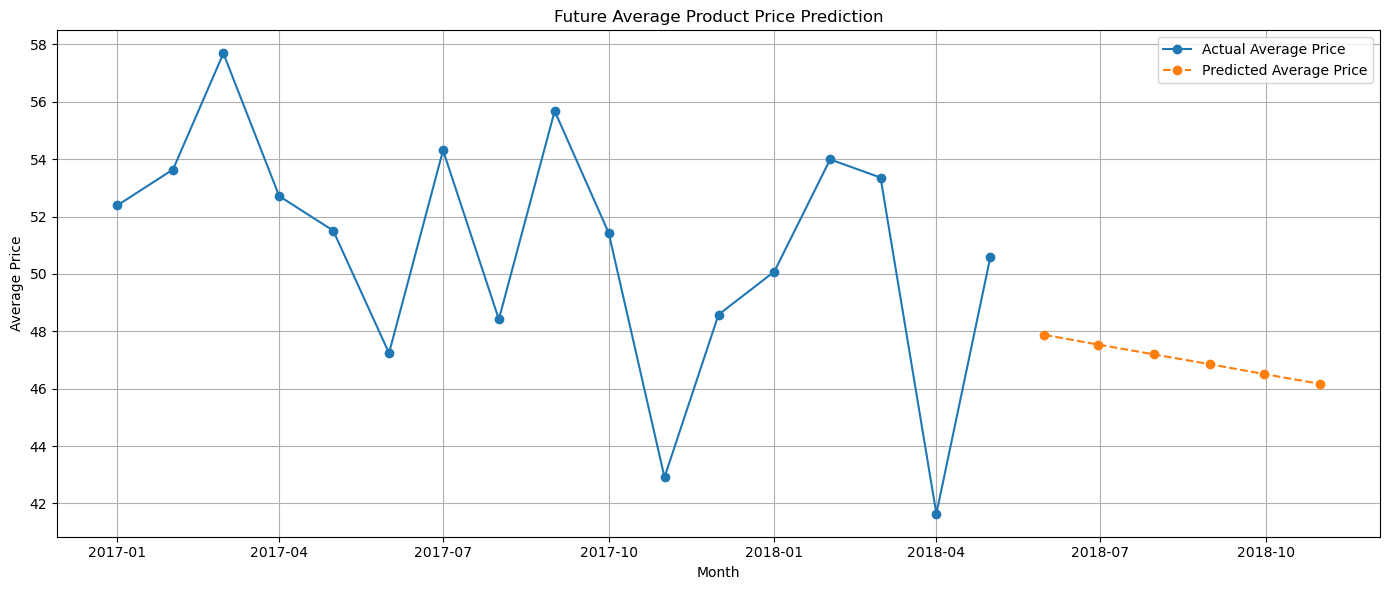

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.rcParams["figure.figsize"] = (14, 6)

# Load dataset
df = pd.read_csv('products.csv')

# Convert ModifyDate to datetime
df['ModifyDate'] = pd.to_datetime(df['ModifyDate'], errors='coerce')

# Drop invalid dates
df = df.dropna(subset=['ModifyDate'])

# Fill missing prices
df['Price'] = df['Price'].fillna(df['Price'].mean())

# Monthly average price (USE 'M' HERE)
monthly_price = (
    df.groupby(df['ModifyDate'].dt.to_period('M'))['Price']
      .mean()
      .reset_index()
)

# Convert period to timestamp
monthly_price['ModifyDate'] = monthly_price['ModifyDate'].dt.to_timestamp()

# Create time index
monthly_price['TimeIndex'] = np.arange(len(monthly_price))

# Features & target
X = monthly_price[['TimeIndex']]
y = monthly_price['Price']

# Train model
model = LinearRegression()
model.fit(X, y)

# Future time index (next 6 months)
future_index = pd.DataFrame({
    'TimeIndex': np.arange(len(monthly_price), len(monthly_price) + 6)
})

# Future dates (USE 'ME' HERE)
future_dates = pd.date_range(
    start=monthly_price['ModifyDate'].iloc[-1],
    periods=6,
    freq='ME'
)

# Predict future prices
future_prices = model.predict(future_index)

# Future dataframe
future_df = pd.DataFrame({
    'ModifyDate': future_dates,
    'PredictedPrice': future_prices
})

# -------- PLOT --------
plt.plot(
    monthly_price['ModifyDate'],
    monthly_price['Price'],
    marker='o',
    label='Actual Average Price'
)

plt.plot(
    future_df['ModifyDate'],
    future_df['PredictedPrice'],
    marker='o',
    linestyle='--',
    label='Predicted Average Price'
)

plt.title('Future Average Product Price Prediction')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
